<a href="https://colab.research.google.com/github/aadi-kanwar/Algorithms/blob/main/Exp_11_Inferencing_in_Bayesian_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

12.11.2024

## Install Library

In [1]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.3 MB/s eta 0:00:00


## Import Required Dependencies

In [2]:
import pgmpy.models
import pgmpy.inference
import networkx as nx
import pylab as plt
import matplotlib.pyplot as plt

## Create Bayesian Network

In [3]:
# Create a bayesian network
model = pgmpy.models.BayesianNetwork([('Burglary', 'Alarm'), ('Earthquake', 'Alarm'),
                                    ('Alarm', 'JohnCalls'), ('Alarm', 'MaryCalls')])
cpd_burglary = pgmpy.factors.discrete.TabularCPD('Burglary', 2, [[0.001], [0.999]])
cpd_earthquake = pgmpy.factors.discrete.TabularCPD('Earthquake', 2, [[0.002], [0.998]])
cpd_alarm = pgmpy.factors.discrete.TabularCPD('Alarm', 2, [[0.95, 0.94, 0.29, 0.001],
    [0.05, 0.06, 0.71, 0.999]], evidence=['Burglary', 'Earthquake'], evidence_card=[2, 2])
cpd_john = pgmpy.factors.discrete.TabularCPD('JohnCalls', 2, [[0.90, 0.05],
                         [0.10, 0.95]],  evidence=['Alarm'],  evidence_card=[2])
cpd_mary = pgmpy.factors.discrete.TabularCPD('MaryCalls', 2, [[0.70, 0.01],
                    [0.30, 0.99]],  evidence=['Alarm'],  evidence_card=[2])

model.add_cpds(cpd_burglary, cpd_earthquake, cpd_alarm, cpd_john, cpd_mary)
model.check_model()

True

## Print Probability Distributions

In [4]:
# Print probability distributions
print('Probability distribution, P(Burglary)')
print(cpd_burglary)
print()
print('Probability distribution, P(Earthquake)')
print(cpd_earthquake)
print()
print('Joint probability distribution, P(Alarm | Burglary, Earthquake)')
print(cpd_alarm)
print()
print('Joint probability distribution, P(JohnCalls | Alarm)')
print(cpd_john)
print()
print('Joint probability distribution, P(MaryCalls | Alarm)')
print(cpd_mary)
infer = pgmpy.inference.VariableElimination(model)

Probability distribution, P(Burglary)
+-------------+-------+
| Burglary(0) | 0.001 |
+-------------+-------+
| Burglary(1) | 0.999 |
+-------------+-------+

Probability distribution, P(Earthquake)
+---------------+-------+
| Earthquake(0) | 0.002 |
+---------------+-------+
| Earthquake(1) | 0.998 |
+---------------+-------+

Joint probability distribution, P(Alarm | Burglary, Earthquake)
+------------+---------------+---------------+---------------+---------------+
| Burglary   | Burglary(0)   | Burglary(0)   | Burglary(1)   | Burglary(1)   |
+------------+---------------+---------------+---------------+---------------+
| Earthquake | Earthquake(0) | Earthquake(1) | Earthquake(0) | Earthquake(1) |
+------------+---------------+---------------+---------------+---------------+
| Alarm(0)   | 0.95          | 0.94          | 0.29          | 0.001         |
+------------+---------------+---------------+---------------+---------------+
| Alarm(1)   | 0.05          | 0.06          | 0.71  

## Calculate the probability of Burgalary if....

In [5]:
# Calculate the probability of a burglary if John and Mary calls (0: True, 1: False)
posterior_probability = infer.query(['Burglary'], evidence={'JohnCalls': 0, 'MaryCalls': 0})
print('Posterior probability of Burglary if JohnCalls(True) and MaryCalls(True)')
print(posterior_probability)
print()

Posterior probability of Burglary if JohnCalls(True) and MaryCalls(True)
+-------------+-----------------+
| Burglary    |   phi(Burglary) |
+=============+=================+
| Burglary(0) |          0.2842 |
+-------------+-----------------+
| Burglary(1) |          0.7158 |
+-------------+-----------------+



## Calculate the probability of alarm starting if there is a burgalary and an earthquake.
### `0: False, 1: True`

Posterior probability of Alarm sounding if Burglary(True) and Earthquake(True)
+----------+--------------+
| Alarm    |   phi(Alarm) |
+==========+==============+
| Alarm(0) |       0.9500 |
+----------+--------------+
| Alarm(1) |       0.0500 |
+----------+--------------+


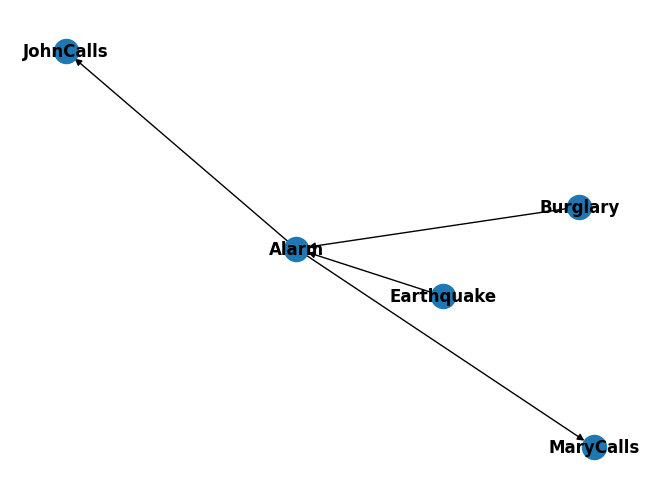

In [6]:
# Calculate the probability of alarm starting if there is a burglary and an earthquake (0: True, 1: False)
posterior_probability = infer.query(['Alarm'], evidence={'Burglary': 0, 'Earthquake': 0})
print('Posterior probability of Alarm sounding if Burglary(True) and Earthquake(True)')
print(posterior_probability)

G = nx.DiGraph()
G.add_nodes_from(["Burglary", "Earthquake", "Alarm", "JohnCalls","MaryCalls"])
G.add_edges_from([("Burglary", "Alarm"), ("Earthquake", "Alarm"), ("Alarm", "JohnCalls"),("Alarm", "MaryCalls")])
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()
